In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cases = pd.read_csv("/project/biocomplexity/COVID-19_commons/data/NyTimes/us-states.csv", parse_dates = ["date"], dtype= {"fips":str})
cases = cases.pivot(index="date", columns="fips", values = "cases")

In [3]:
testing = pd.read_csv("/sfs/qumulo/qproject/biocomplexity/COVID-19_commons/products/external_data_collection/VDH_public/VDH-COVID-19-PublicUseDataset-Tests_by-LabReportDate.csv", parse_dates=["lab_report_date"])
print(testing[testing.lab_report_date == "Not Reported"].sum())
testing = testing[testing.lab_report_date != "Not Reported"]
testing.lab_report_date = pd.to_datetime(testing.lab_report_date)
testing["total_positive"] = testing.total_number_of_positive - testing.number_of_positive_antibody_testing_encounters
print(testing[[t for t in testing.columns if "positive" in t]].sum())
total_pos_testing = testing.pivot(index="lab_report_date", columns= "health_district", values="total_positive").fillna(0)
testing = testing.pivot(index="lab_report_date", columns= "health_district", values="number_of_positive_pcr_testing").fillna(0)


lab_report_date                                   Not ReportedNot ReportedNot ReportedNot Report...
health_district                                   AlexandriaAlleghanyArlingtonCentral Shenandoah...
number_of_pcr_testing                                                                         41132
number_of_positive_pcr_testing                                                                11875
number_of_antigen_testing_encounters                                                           6011
number_of_positive_antigen_testing_encounters                                                  4005
number_of_antibody_testing_encounters                                                          1300
number_of_positive_antibody_testing_encounters                                                  292
total_number_of_testing                                                                       48443
total_number_of_positive                                                                      16172


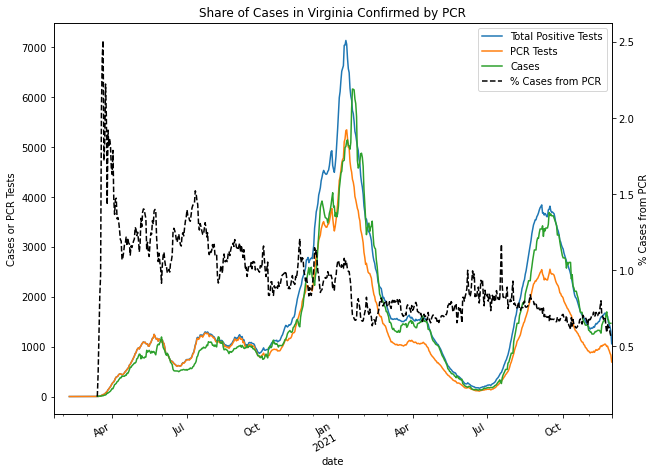

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
twinx = ax.twinx()
tp = total_pos_testing.sum(axis=1).rolling(7).mean()
t = testing.sum(axis=1).rolling(7).mean()
c = cases["51"].diff().rolling(7).mean()

tp.plot(ax=ax, label="Total Positive Tests")
t.plot(ax=ax, label="PCR Tests")
c.plot(ax=ax, label="Cases")

(t/c).plot(ax=twinx, label="% Cases from PCR",  color="k", linestyle="--")

ax.set_ylabel("Cases or PCR Tests")
twinx.set_ylabel("% Cases from PCR")
plt.title("Share of Cases in Virginia Confirmed by PCR")

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = twinx.get_legend_handles_labels()

ax.legend(h1+h2, l1+l2)

plt.savefig("share_of_cases_VA_from_PCR.png", dpi=100, facecolor="white", bbox_inches="tight")

0.694482001774392


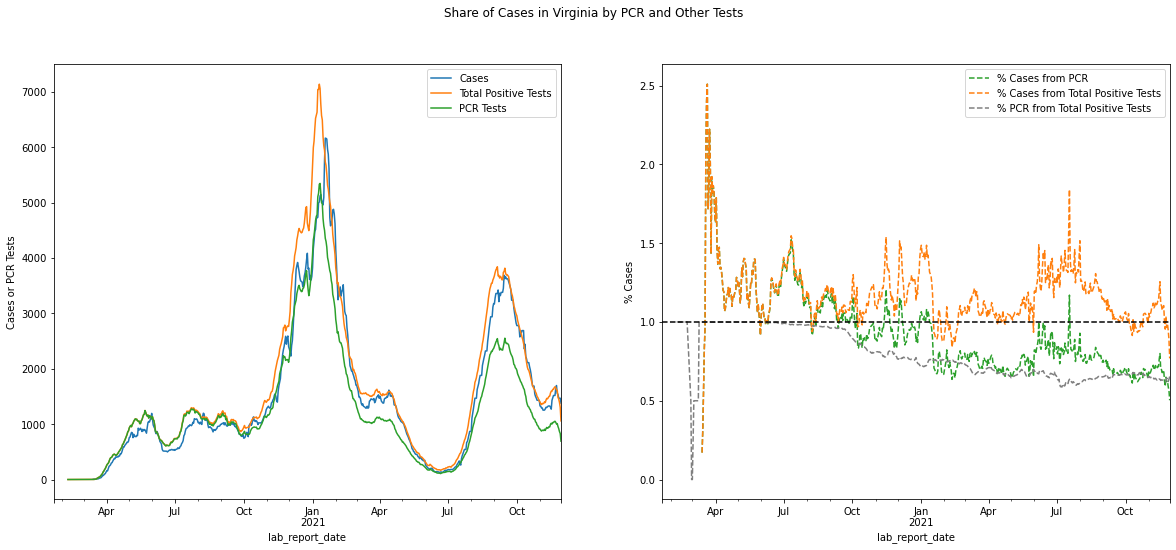

In [4]:
fig, axs = plt.subplots(figsize=(20,8), ncols=2)

ax=axs[0]
tp = total_pos_testing.sum(axis=1).rolling(7).mean()
t = testing.sum(axis=1).rolling(7).mean()
c = cases["51"].diff().rolling(7).mean()

c.plot(ax=ax, label="Cases")
tp.plot(ax=ax, label="Total Positive Tests")
t.plot(ax=ax, label="PCR Tests")

ax.set_ylabel("Cases or PCR Tests")
ax.legend()

ax=axs[1]
print((t/c).iloc[-28:].median())
(t/c).plot(ax=ax, label="% Cases from PCR", linestyle="--", color="tab:green")
(tp/c).plot(ax=ax, label="% Cases from Total Positive Tests", linestyle="--", color="tab:orange")
(t/tp).plot(ax=ax, label="% PCR from Total Positive Tests", linestyle="--", color="tab:grey")
ax.axhline(1, color="k", linestyle="--")

ax.set_ylabel("% Cases")
ax.legend()

plt.suptitle("Share of Cases in Virginia by PCR and Other Tests")

plt.savefig("share_of_cases_VA_from_PCR_with_props.png", dpi=100, facecolor="white", bbox_inches="tight")